In [15]:
#import libraries


import tensorflow as tf 
import numpy as np 
import matplotlib.pyplot as plt  

In [11]:
#import dataset


fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [12]:
#mapping images to single label


class_names =['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']


In [13]:
#explore the data


print(train_images.shape)
print(train_labels)

print(test_images.shape)
print(len(test_labels))



(60000, 28, 28)
[9 0 0 ... 3 0 5]
(10000, 28, 28)
10000


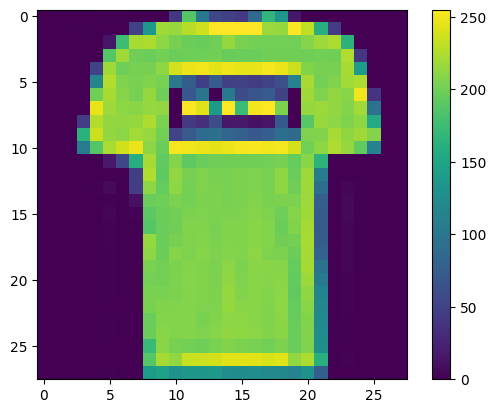

In [20]:
#preprocess the data

# 1. Plot the images
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

In [21]:
# 2. Scaling the values between 0 to 1

train_images = train_images/255.0
test_images = test_images/255.0


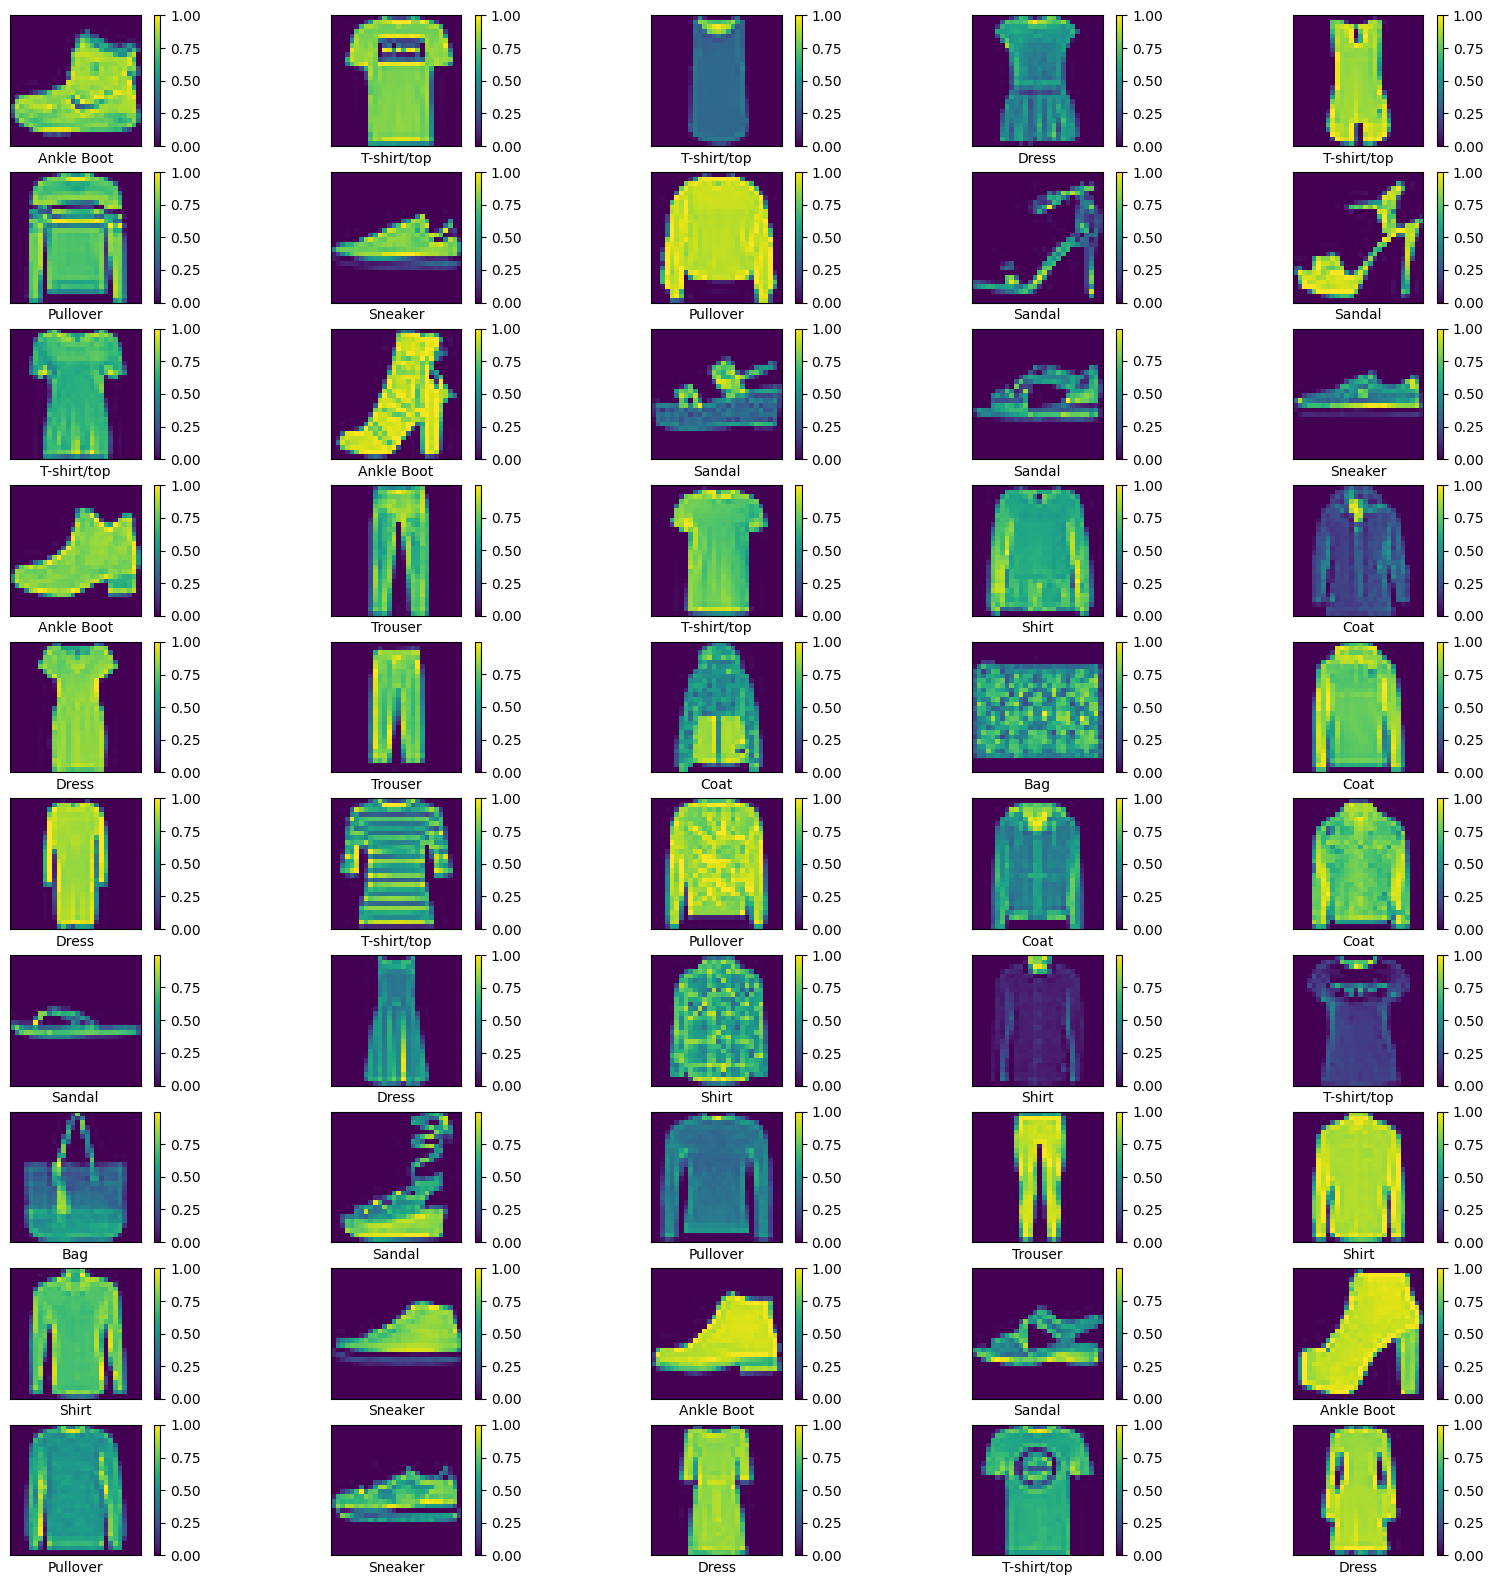

In [34]:
# 3. Display first 25 images from the training set

plt.figure(figsize=(20,20))

for i in range(50):
  plt.subplot(10,5,i+1)
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(train_images[i])
  plt.colorbar()
  plt.xlabel(class_names[train_labels[i]])

plt.show()

In [35]:
# Build the model

model = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape = (28,28)),
  tf.keras.layers.Dense(128, activation = 'relu'),
  tf.keras.layers.Dense(10)
])

In [36]:
# Compile the model

model.compile(optimizer='adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [50]:
# Train the model

#Feed the model with training set
model.fit(train_images, train_labels, epochs = 20)



Epoch 1/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2297 - accuracy: 0.9143
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2244 - accuracy: 0.9158
Epoch 3/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2139 - accuracy: 0.9201
Epoch 4/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2062 - accuracy: 0.9225
Epoch 5/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2015 - accuracy: 0.9238
Epoch 6/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1949 - accuracy: 0.9276
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1902 - accuracy: 0.9283
Epoch 8/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1857 - accuracy: 0.9288
Epoch 9/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1806 - accuracy: 0.9311
Epoch 10/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.174

In [51]:
#Evaluate accuracy

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose =2)
print('Test accuracy', test_acc)

313/313 - 0s - loss: 0.3952 - accuracy: 0.8926 - 343ms/epoch - 1ms/step
Test accuracy 0.8925999999046326


In [52]:
#Make Predictions

probability_model = tf.keras.Sequential([model,tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images) 

313/313 [==============================] - 0s 1ms/step


In [53]:
predictions[0]

array([7.5322611e-16, 1.5821930e-17, 7.0431822e-13, 5.7153176e-21,
       1.1939036e-13, 4.2342886e-06, 8.2337415e-11, 4.1295789e-05,
       1.1178735e-10, 9.9995446e-01], dtype=float32)

In [54]:
np.argmax(predictions[0])

9

In [55]:
test_labels[0]

9

In [62]:
# Define functions to graph the full set of 10 class predictions

def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks()
  plt.yticks()
  
  plt.imshow(img, cmap= plt.cm.binary)
  
  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color ='red'
  
  plt.xlabel("{} {:2.0f}% ({})" .format(class_names[predicted_label],
                                        100*np.max(predictions_array),
                                        class_names[true_label]),
                                        color=color)
  
  
def plot_value_array(i, predictions_array, true_label):
  true_label= true_label[i]
  plt.grid(False)
  plt.xticks(range (10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color = "#777777")
  plt.ylim([0,1])
  predicted_label = np.argmax(predictions_array)
  
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')
  
  

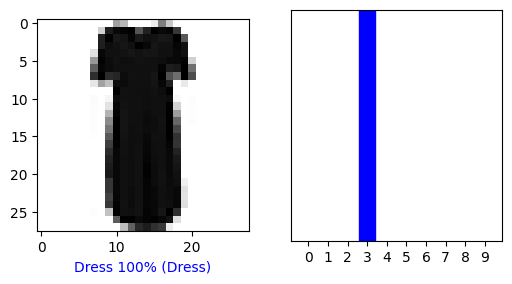

In [73]:
i = 159
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i,predictions[i], test_labels)
plt.show()